In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2), padding='valid', activation="relu",
               input_shape=(128,128,3), data_format='channels_last'))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=2))

cnn.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=2))

cnn.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid', activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=2))

cnn.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid', activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=2))

cnn.add(Flatten())
cnn.add(Dropout(0.1))
cnn.add(Dense(256))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10))
cnn.add(Activation('softmax'))
cnn.compile(loss='categorical_crossentropy', 
            optimizer=keras.optimizers.Adam(learning_rate=0.001), 
            metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         2

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Generator for Keras
train_datagen = ImageDataGenerator(rotation_range = 90, rescale = 1./255, horizontal_flip = True)
train_generator = train_datagen.flow_from_directory('cropped_data/train',
    target_size=(128,128), batch_size=256, class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory('cropped_data/validation',
    target_size=(128,128), batch_size=256, class_mode='categorical')

Found 14130 images belonging to 10 classes.
Found 3606 images belonging to 10 classes.


In [3]:
import time
start = time.time()
cnn.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator)
end = time.time()
print('Processing time:',(end-start)/60)

Epoch 1/50
14/14 [==============================] - 66s 5s/step - loss: 2.2434 - accuracy: 0.1470 - val_loss: 2.1003 - val_accuracy: 0.2329
Epoch 2/50
14/14 [==============================] - 64s 5s/step - loss: 2.0402 - accuracy: 0.2399 - val_loss: 1.8595 - val_accuracy: 0.3170
Epoch 3/50
14/14 [==============================] - 69s 5s/step - loss: 1.8672 - accuracy: 0.3152 - val_loss: 1.6955 - val_accuracy: 0.3874
Epoch 4/50
14/14 [==============================] - 71s 5s/step - loss: 1.7275 - accuracy: 0.3744 - val_loss: 1.6029 - val_accuracy: 0.4207
Epoch 5/50
14/14 [==============================] - 71s 5s/step - loss: 1.6326 - accuracy: 0.4007 - val_loss: 1.4963 - val_accuracy: 0.4645
Epoch 6/50
14/14 [==============================] - 75s 5s/step - loss: 1.5191 - accuracy: 0.4545 - val_loss: 1.4265 - val_accuracy: 0.4922
Epoch 7/50
14/14 [==============================] - 68s 5s/step - loss: 1.4470 - accuracy: 0.4798 - val_loss: 1.3239 - val_accuracy: 0.5355
Epoch 8/50
14/14 [==

In [7]:
cnn.save('C:\\Users\\Bowen\\Documents\\')

INFO:tensorflow:Assets written to: C:\Users\Bowen\Documents\assets


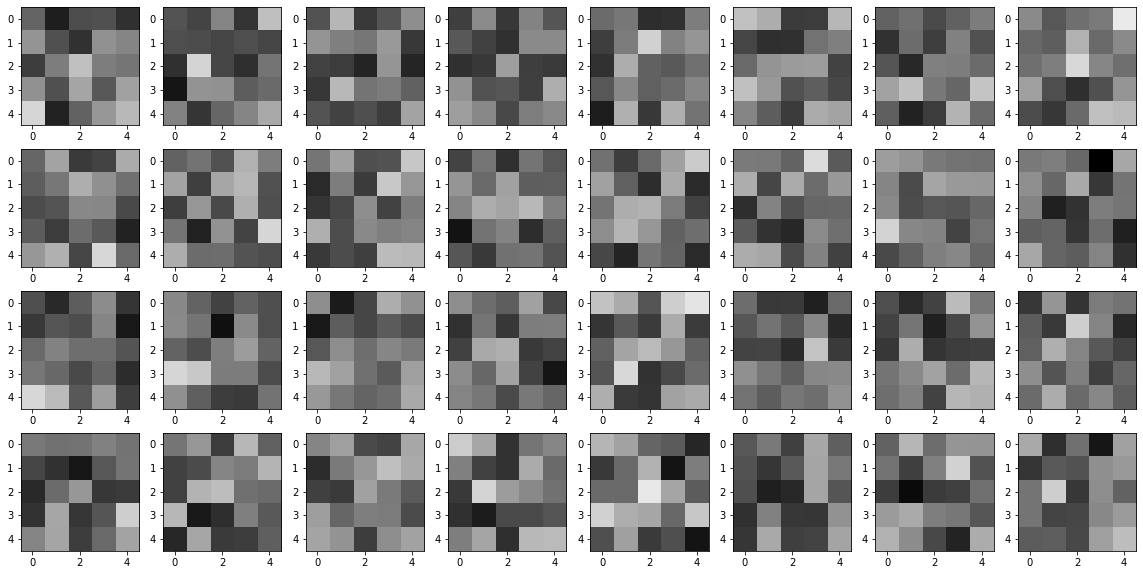

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Pull the 32 kernels from the first convolutional layer

fig=plt.figure(figsize=(20, 10))
columns, rows = 8, 4
for i in range(1, columns*rows +1):
    f = filters[:, :, :, i-1]
    img = Image.fromarray(f, 'RGB')
    img = img.convert("LA")
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [64]:
from tensorflow.keras import backend

def calculate_recall(true, pred):
    return backend.sum(backend.round(backend.clip(true * pred, 0, 1))) / (backend.sum(backend.round(backend.clip(true, 0, 1))) + backend.epsilon())

def calculate_precision(true, pred):
    return backend.sum(backend.round(backend.clip(true * pred, 0, 1))) / (backend.sum(backend.round(backend.clip(pred, 0, 1))) + backend.epsilon())

def calculate_f1(true, pred):
    precision = precision_m(true, pred)
    recall = recall_m(true, pred)
    return 2*((precision*recall)/(precision+recall+backend.epsilon()))

In [44]:
cnn.compile(loss='categorical_crossentropy', 
    optimizer=keras.optimizers.Adam(learning_rate=0.001), 
    metrics=['accuracy', recall_m, precision_m, f1_m])

In [45]:
loss, accuracy, recall, precision, f1_score  = cnn.evaluate(validation_generator, verbose=0)

In [65]:
print(loss)
print(accuracy)
print(recall)
print(precision)
print(f1_score)

0.6878608465194702
0.7645590901374817
0.6846151351928711
0.8460718393325806
0.7568193078041077
